In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
path = "ScoreSight_ML_Season_LeagueWinner_Champion (1).csv"
df = pd.read_csv(path)
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
    season         team  matches_played  wins  draws  losses  points_per_game  \
0  2015-16  Bournemouth              38    11      9      18         1.105263   
1  2015-16      Norwich              38     9      7      22         0.894737   
2  2015-16   Man United              38    19      9      10         1.736842   
3  2015-16      Chelsea              38    12     14      12         1.315789   
4  2015-16      Everton              38    11     14      13         1.236842   

   goals_scored  goals_conceded  goal_difference  target_total_points  \
0          45.0            67.0            -22.0                   42   
1          39.0            67.0            -28.0                   34   
2          49.0            35.0             14.0                   66   
3          59.0            53.0              6.0                   50   
4          59.0            55.0              4.0                   47   

   target_league_position  target_champion  t

In [3]:
selected_columns = [
    'matches_played',
    'wins',
    'draws',
    'losses',
    'goals_scored',
    'goals_conceded',
    'target_total_points',
    'target_top_4'  
]

df = df[selected_columns]

print("Selected columns DataFrame:")
print(df.head())
print("\nDataFrame shape:", df.shape)


Selected columns DataFrame:
   matches_played  wins  draws  losses  goals_scored  goals_conceded  \
0              38    11      9      18          45.0            67.0   
1              38     9      7      22          39.0            67.0   
2              38    19      9      10          49.0            35.0   
3              38    12     14      12          59.0            53.0   
4              38    11     14      13          59.0            55.0   

   target_total_points  target_top_4  
0                   42             0  
1                   34             0  
2                   66             1  
3                   50             0  
4                   47             0  

DataFrame shape: (180, 8)


In [4]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nAny duplicates?:", df.duplicated().any())


Missing Values:
 matches_played         0
wins                   0
draws                  0
losses                 0
goals_scored           0
goals_conceded         0
target_total_points    0
target_top_4           0
dtype: int64

Any duplicates?: False


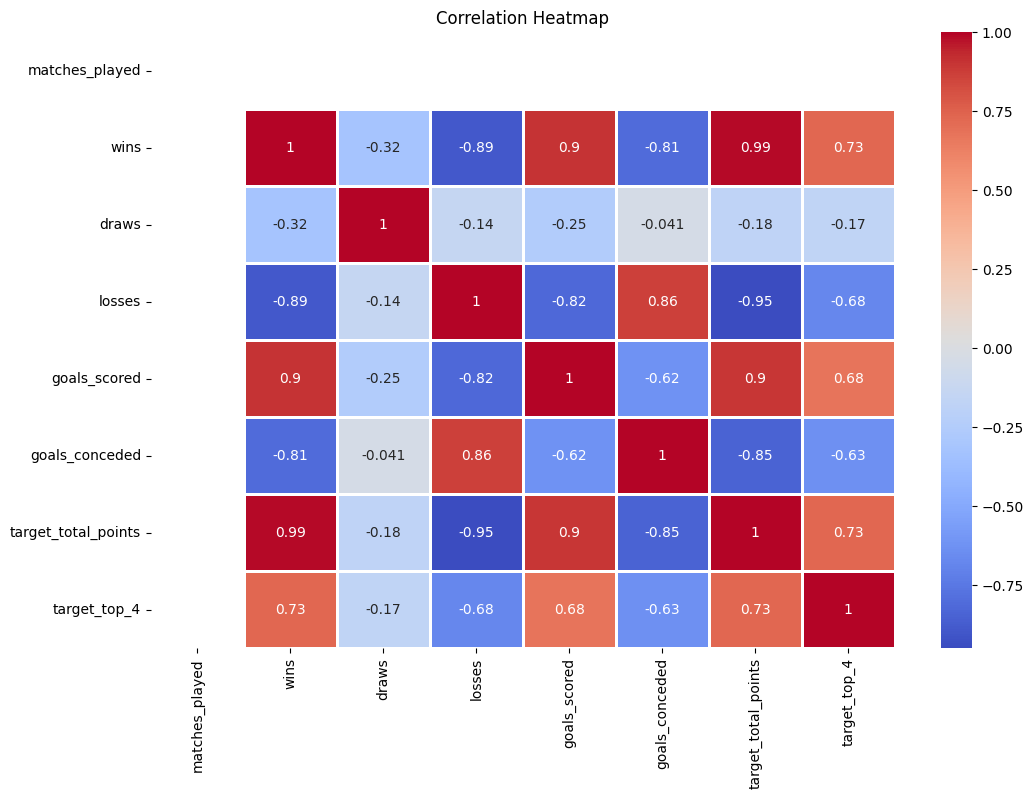

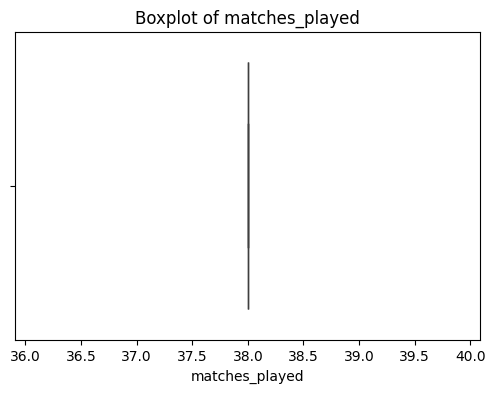

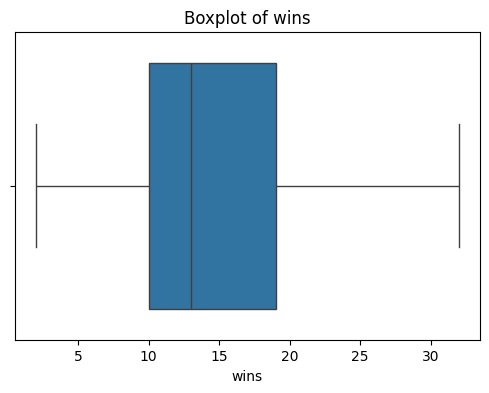

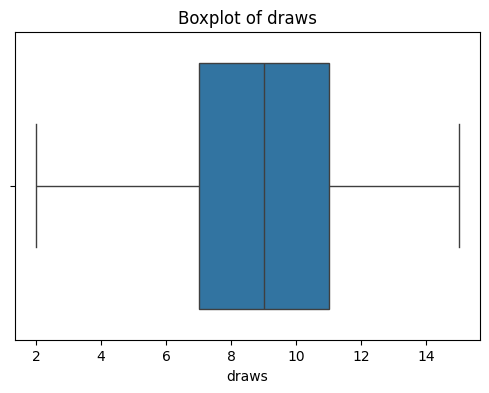

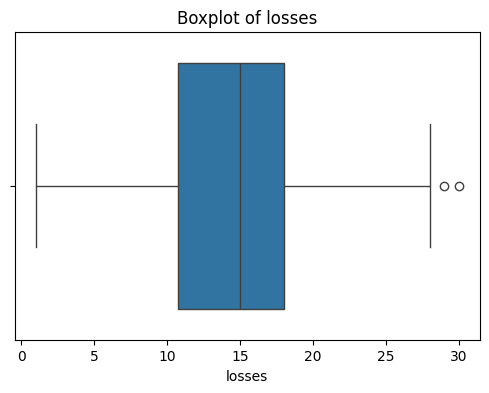

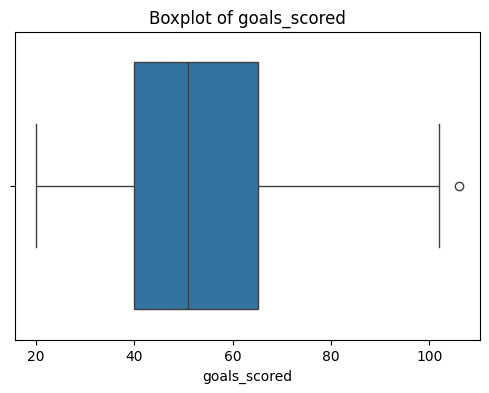

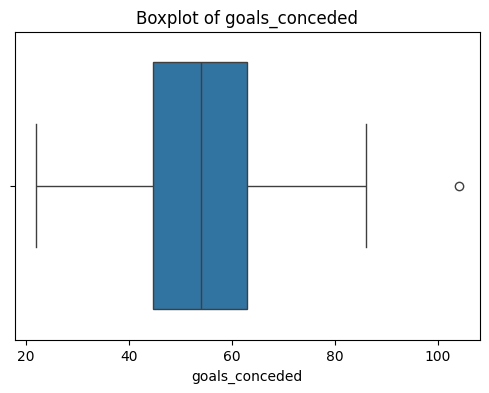

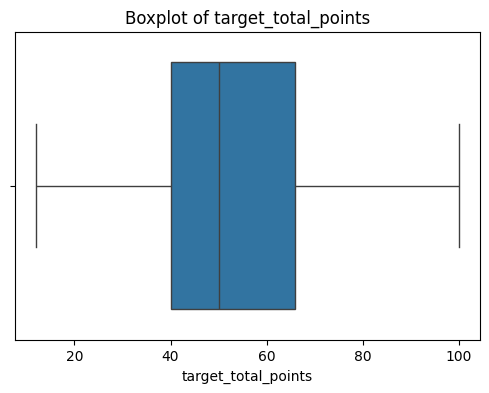

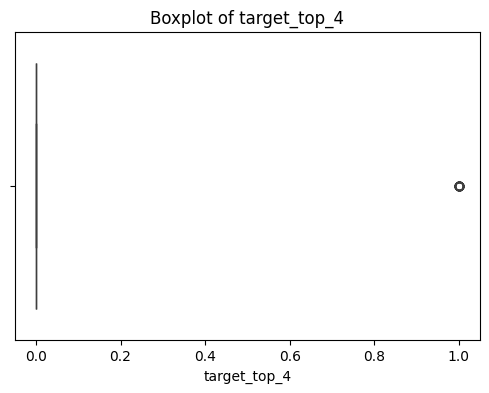

In [5]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

for col in numeric_df.columns.tolist():
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [6]:
def remove_outliers_safe(df, target_col='target_top_4'):
    df_cleaned = df.copy()
    numerical_cols = df_cleaned.select_dtypes(include='number').columns.tolist()
    numerical_cols.remove(target_col) 
    for col in numerical_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
    
    print(f"Rows before cleaning: {len(df)}, after cleaning: {len(df_cleaned)}")
    print("Target distribution after cleaning:")
    print(df_cleaned[target_col].value_counts())
    return df_cleaned

df_cleaned = remove_outliers_safe(df)


Rows before cleaning: 180, after cleaning: 176
Target distribution after cleaning:
target_top_4
0    140
1     36
Name: count, dtype: int64


In [9]:
TARGETS = [col for col in df.columns if col.startswith("target_")]
print("\nTARGETS:", TARGETS)

for target in TARGETS:
    print("\n==== Processing target:", target, "====")
    
   
    X = df.drop(columns=[target]).copy()

    y = df[target].copy()
    
 
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    print("First 5 rows of X:\n", X.head())
    print("First 5 values of y:\n", y.head())



TARGETS: ['target_total_points', 'target_league_position', 'target_champion', 'target_top_4', 'target_top_6', 'target_relegated']

==== Processing target: target_total_points ====
X shape: (180, 15)
y shape: (180,)
First 5 rows of X:
     season         team  matches_played  wins  draws  losses  points_per_game  \
0  2015-16  Bournemouth              38    11      9      18         1.105263   
1  2015-16      Norwich              38     9      7      22         0.894737   
2  2015-16   Man United              38    19      9      10         1.736842   
3  2015-16      Chelsea              38    12     14      12         1.315789   
4  2015-16      Everton              38    11     14      13         1.236842   

   goals_scored  goals_conceded  goal_difference  target_league_position  \
0          45.0            67.0            -22.0                      15   
1          39.0            67.0            -28.0                      19   
2          49.0            35.0             14.0 

X shape: (180, 15)
y shape: (180,)
First 5 rows of X:
     season         team  matches_played  wins  draws  losses  points_per_game  \
0  2015-16  Bournemouth              38    11      9      18         1.105263   
1  2015-16      Norwich              38     9      7      22         0.894737   
2  2015-16   Man United              38    19      9      10         1.736842   
3  2015-16      Chelsea              38    12     14      12         1.315789   
4  2015-16      Everton              38    11     14      13         1.236842   

   goals_scored  goals_conceded  goal_difference  target_total_points  \
0          45.0            67.0            -22.0                   42   
1          39.0            67.0            -28.0                   34   
2          49.0            35.0             14.0                   66   
3          59.0            53.0              6.0                   50   
4          59.0            55.0              4.0                   47   

   target_league_po

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train shape: (140, 7)
X_test shape: (36, 7)
y_train distribution:
 target_top_4
0    111
1     29
Name: count, dtype: int64
y_test distribution:
 target_top_4
0    29
1     7
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

print("First 5 rows of X_train_scaled:\n", X_train_scaled[:5])


X_train_scaled shape: (140, 7)
X_test_scaled shape: (36, 7)
First 5 rows of X_train_scaled:
 [[ 0.          0.71305038  0.01022139 -0.77337245  0.24301433 -0.20116929
   0.7494512 ]
 [ 0.         -0.08812982 -0.34752729  0.26272461 -0.1006423   0.39965631
  -0.14684922]
 [ 0.         -1.69049024  0.36797007  1.64418737 -1.01705997  2.12702992
  -1.71537495]
 [ 0.         -1.53025419  1.44121612  0.95345599 -1.53254491 -0.05096289
  -1.3792623 ]
 [ 0.          0.07210622  1.7989648  -0.9460553  -0.1579184  -1.02730449
   0.35731977]]


In [ ]:
y_pred = model.predict(X_test_scaled)
print("Predictions on test set:\n", y_pred[:10]) 

Predictions on test set:
 [1 0 0 0 1 0 0 0 0 0]


Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.86      0.92         7

    accuracy                           0.97        36
   macro avg       0.98      0.93      0.95        36
weighted avg       0.97      0.97      0.97        36



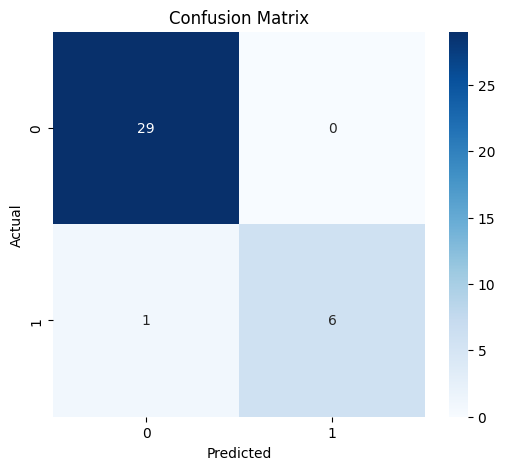

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
